In [178]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
data=pd.read_csv('C:\\Users\\Rohith\\Desktop\\ML\\ML Final\\Breast Cancer Prediction.csv')
data = data.rename(columns={
    "Class": "Malignant"
})
#dataframe = shuffle(dataframe)
data.loc[data["Malignant"]==2, "Malignant"] = 0
data.loc[data["Malignant"]==4, "Malignant"] = 1
data = data.astype(float)
data.head()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Malignant
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


In [179]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [472]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SampleCodeNumber          683 non-null    float64
 1   ClumpThickness            683 non-null    float64
 2   UniformityOfCellSize      683 non-null    float64
 3   UniformityOfCellShape     683 non-null    float64
 4   MarginalAdhesion          683 non-null    float64
 5   SingleEpithelialCellSize  683 non-null    float64
 6   BareNuclei                683 non-null    float64
 7   BlandChromatin            683 non-null    float64
 8   NormalNucleoli            683 non-null    float64
 9   Mitoses                   683 non-null    float64
 10  Malignant                 683 non-null    float64
dtypes: float64(11)
memory usage: 58.8 KB


In [473]:
data.describe()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Malignant
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [180]:
data.dtypes

SampleCodeNumber            float64
ClumpThickness              float64
UniformityOfCellSize        float64
UniformityOfCellShape       float64
MarginalAdhesion            float64
SingleEpithelialCellSize    float64
BareNuclei                  float64
BlandChromatin              float64
NormalNucleoli              float64
Mitoses                     float64
Malignant                   float64
dtype: object

In [181]:
data.isnull().sum()

SampleCodeNumber            0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Malignant                   0
dtype: int64

<AxesSubplot:>

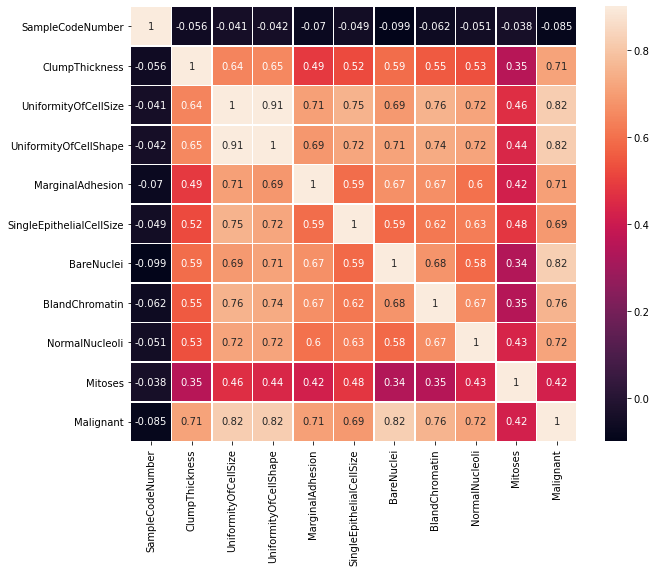

In [182]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot= True, vmax= 0.9,linewidths =0.5)



In [477]:
data['Malignant'].value_counts()


0.0    444
1.0    239
Name: Malignant, dtype: int64

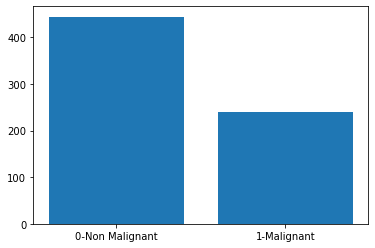

In [483]:
import matplotlib.pyplot as plt
a=data['Malignant'].value_counts()[0]
b=data['Malignant'].value_counts()[1]
height = [a,b]
bars = ('0-Non Malignant','1-Malignant')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

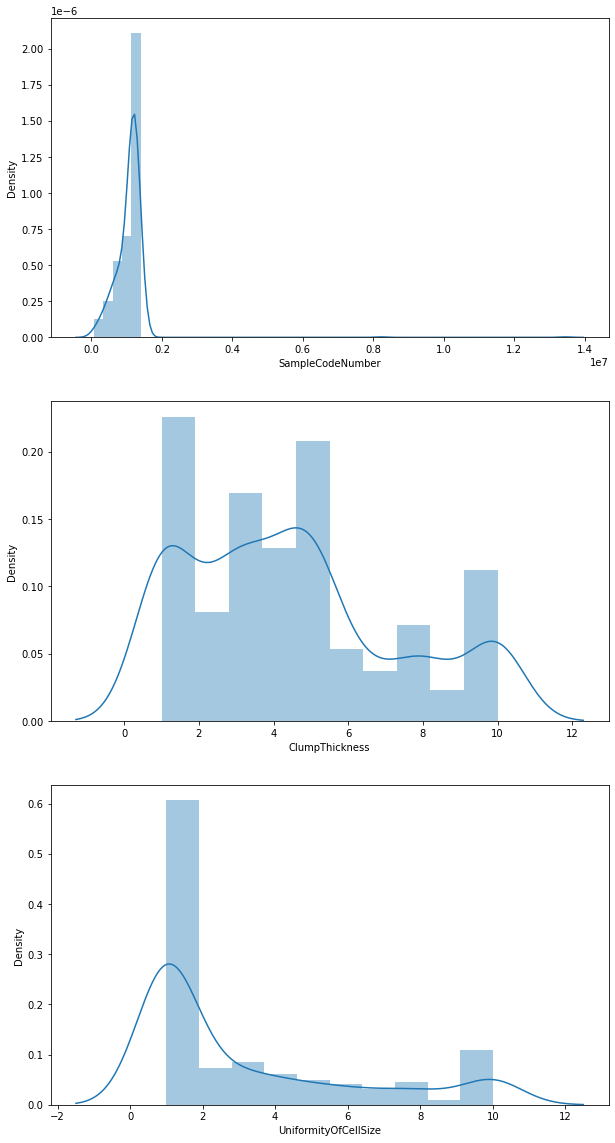

In [230]:
fig, ax1 = plt.subplots(3, figsize=(10,20))
columns = list(data.drop(columns= ['Malignant']).columns)
k = 0

for i in range(3):          
        sns.distplot(data[columns[k]], ax = ax1[i])
        k += 1


In [185]:
import warnings
warnings.filterwarnings('ignore')


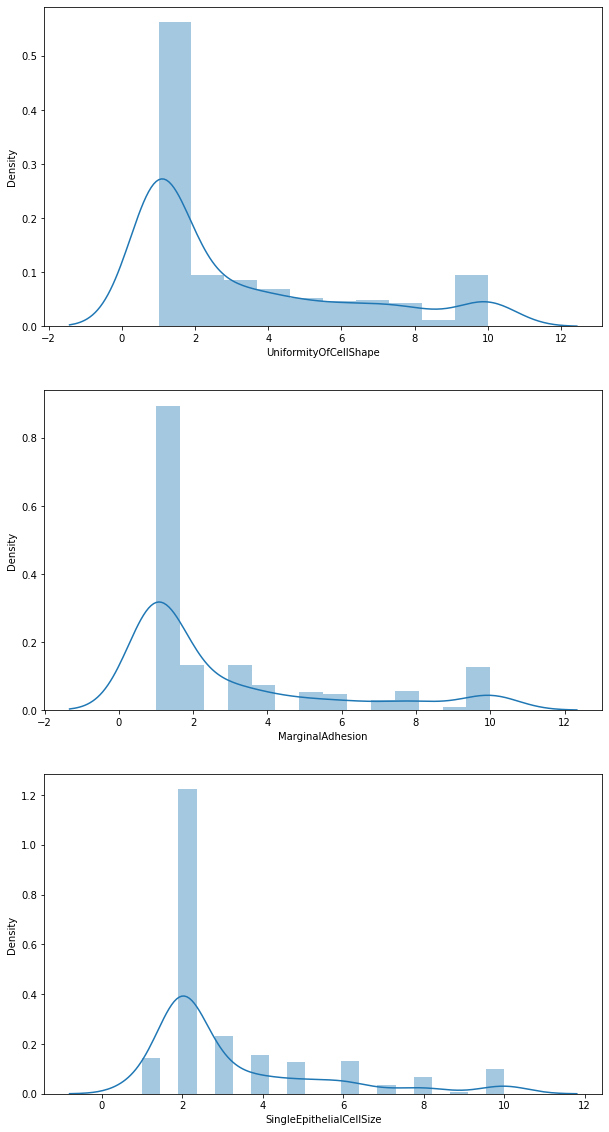

In [186]:
fig, ax = plt.subplots(3, figsize=(10,20))

for i in range(3):             
        sns.distplot(data[columns[k]], ax = ax[i])
        k += 1


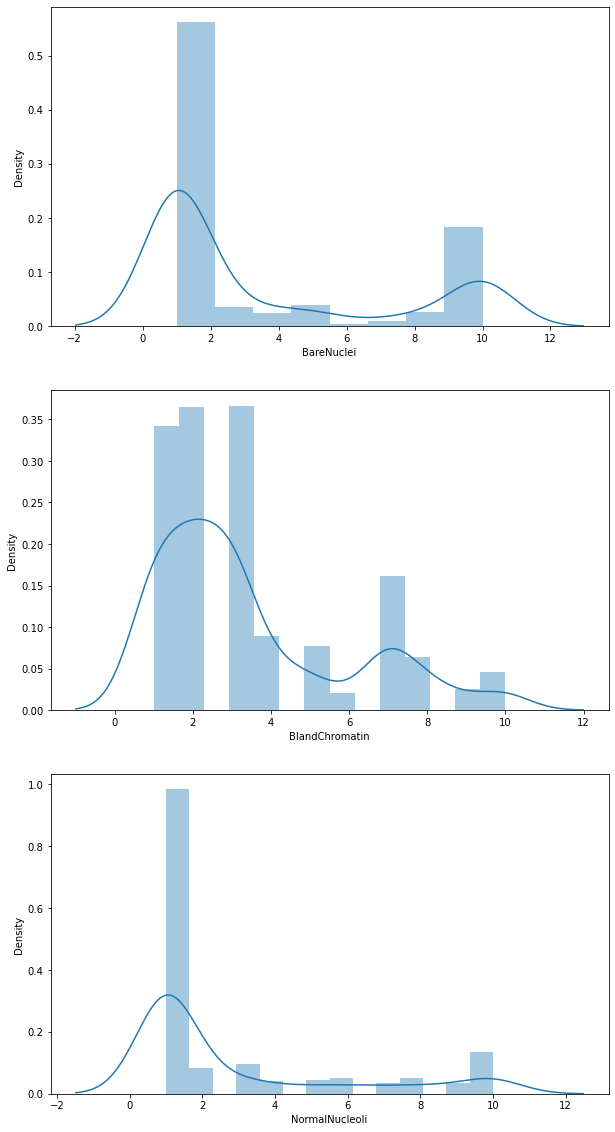

In [187]:
fig, ax4 = plt.subplots(3, figsize=(10,20))

for i in range(3):             
        sns.distplot(data[columns[k]], ax = ax4[i])
        k += 1


In [190]:
# independent variables
x = data.drop('Malignant',axis=1)
#dependent variables
y = data.Malignant

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [470]:
#Linear Regression

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
linear_pred = regr.predict(X_test)
print('Training % for LinearModel: {}\n'.format(regr.score(X_train,y_train) * 100))
score_linear=regr.score(X_test,y_test)*100
print('Testing % for LinearModel:',score_linear)
#print('Testing % for LinearModel: {}\n'.format(regr.score(X_test,y_test) * 100))
print('Mean Squared Error for Linear:', metrics.mean_squared_error(y_test, linear_pred))

Training % for LinearModel: 85.41172256359988

Testing % for LinearModel: {} 81.52707822468437
Mean Squared Error for Linear: 0.042813793874272976


In [480]:
#Gradient Boosting regressor

from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 40, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(X_train, y_train)
score_GBR=clf.score(X_test,y_test)*100
print("GBR>>>>",score_GBR)

GBR>>>> 73.28298291983285


In [351]:
# Deep Neural Network
import tensorflow as tf
from tensorflow import keras
print('tf version:',tf.__version__, 'keras version:',keras.__version__)
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[10,]),
keras.layers.BatchNormalization(),
#keras.layers.Dense(150, activation="relu"),
keras.layers.Dense(190, activation="elu",kernel_initializer="HeNormal"),
keras.layers.Dense(60, activation="relu",kernel_initializer="HeNormal"),
keras.layers.Dense(30, activation="softmax",kernel_initializer="HeNormal"),
keras.layers.Dense(1),
keras.layers.Dropout(rate=0.5),
])
model.summary()




tf version: 2.6.0 keras version: 2.6.0
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 10)                0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 10)                40        
_________________________________________________________________
dense_170 (Dense)            (None, 190)               2090      
_________________________________________________________________
dense_171 (Dense)            (None, 60)                11460     
_________________________________________________________________
dense_172 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 31        
_________________________________________________________________
dropout_44 (Dr

In [481]:
opt = keras.optimizers.RMSprop(learning_rate=0.01,
    rho=0.09,
    momentum=0.1,
    epsilon=1e-07)
model.compile(loss="BinaryCrossentropy",
optimizer= opt,
metrics=["accuracy"])
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
13/13 - 1s - loss: 2.5637 - accuracy: 0.8337 - val_loss: 0.4104 - val_accuracy: 0.9635
Epoch 2/100
13/13 - 0s - loss: 2.5637 - accuracy: 0.8337 - val_loss: 0.4104 - val_accuracy: 0.9635
Epoch 3/100
13/13 - 0s - loss: 2.7145 - accuracy: 0.8240 - val_loss: 0.4104 - val_accuracy: 0.9635
Epoch 4/100
13/13 - 0s - loss: 2.8272 - accuracy: 0.8166 - val_loss: 0.4106 - val_accuracy: 0.9635
Epoch 5/100
13/13 - 0s - loss: 2.5633 - accuracy: 0.8337 - val_loss: 0.4103 - val_accuracy: 0.9635
Epoch 6/100
13/13 - 0s - loss: 2.8281 - accuracy: 0.8166 - val_loss: 0.4105 - val_accuracy: 0.9635
Epoch 7/100
13/13 - 0s - loss: 2.6022 - accuracy: 0.8313 - val_loss: 0.4123 - val_accuracy: 0.9635
Epoch 8/100
13/13 - 0s - loss: 2.7895 - accuracy: 0.8191 - val_loss: 0.4125 - val_accuracy: 0.9635
Epoch 9/100
13/13 - 0s - loss: 3.0165 - accuracy: 0.8044 - val_loss: 0.3946 - val_accuracy: 0.9635
Epoch 10/100
13/13 - 0s - loss: 2.6764 - accuracy: 0.8264 - val_loss: 0.3946 - val_accuracy: 0.9635
Epoch 11/

In [422]:
score = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.9635


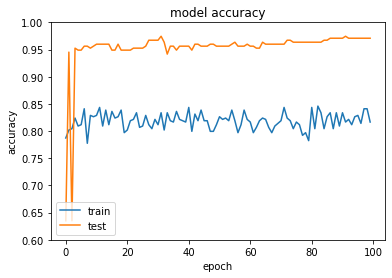

In [334]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.gca().set_ylim(0.6, 1)
plt.show()

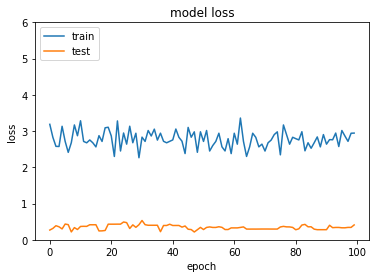

In [354]:
#Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.gca().set_ylim(0, 6)
plt.show()

In [363]:
predictions = model.predict(X_test)
print(predictions)

[[-0.27499852]
 [-0.2749854 ]
 [ 0.53405416]
 [ 0.53405416]
 [-0.27499717]
 [-0.27498278]
 [-0.27477446]
 [ 0.53405416]
 [-0.27499843]
 [-0.2749966 ]
 [ 0.53405416]
 [-0.2749845 ]
 [ 0.53405416]
 [-0.27498576]
 [-0.27849942]
 [-0.27951694]
 [ 0.53405416]
 [ 0.53405416]
 [ 0.53405416]
 [-0.24327978]
 [-0.27498543]
 [-0.2749777 ]
 [ 0.53405416]
 [-0.27499008]
 [ 0.53405416]
 [ 0.53405416]
 [-0.27485707]
 [-0.27499825]
 [-0.27492833]
 [ 0.53405416]
 [-0.27499706]
 [ 0.53405416]
 [ 0.53405416]
 [-0.27497837]
 [-0.27497435]
 [-0.27497837]
 [ 0.53405416]
 [ 0.53405416]
 [-0.27497497]
 [ 0.53405416]
 [-0.2750017 ]
 [-0.27498677]
 [-0.27456075]
 [-0.27498806]
 [-0.274997  ]
 [-0.27499664]
 [-0.27498385]
 [ 0.53405416]
 [-0.2751189 ]
 [-0.27492416]
 [ 0.53405416]
 [-0.2741623 ]
 [ 0.53405416]
 [-0.27493188]
 [-0.26004   ]
 [-0.27500895]
 [ 0.53405416]
 [ 0.53405416]
 [-0.27523386]
 [ 0.53405416]
 [-0.27499533]
 [-0.27499777]
 [-0.27499092]
 [-0.27499056]
 [-0.2749783 ]
 [-0.27499533]
 [-0.27499

In [366]:
y_DNN = (predictions > 0.5)
print(y_DNN)

[[False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 

In [428]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
score_DNN = accuracy_score(y_test,y_DNN)*100
matrix = metrics.confusion_matrix(y_test, y_DNN)
print(matrix)
print(score)

[[168   6]
 [  4  96]]
96.35036496350365


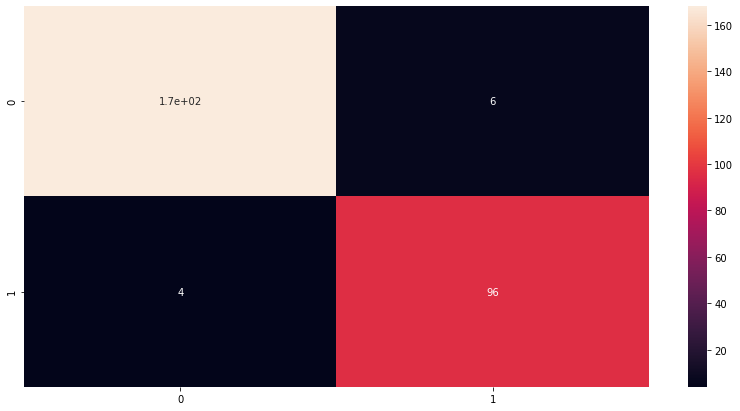

In [429]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sns.heatmap(matrix,annot=True)
plt.show()

In [430]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve ( y_test , y_DNN)

In [ ]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
plot_roc_curve (fpr,tpr) 


In [432]:
auc_score=roc_auc_score(y_test,y_DNN) 
print(auc_score)

0.9627586206896552


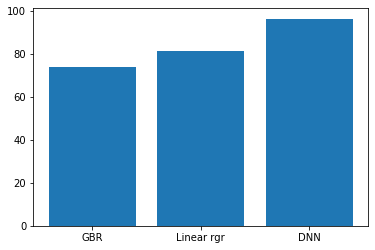

In [434]:
#Accuracy Comparision.
import matplotlib.pyplot as plt
a=score_linear
b=score_GBR
c=score_DNN
height = [b,a,   c]
bars = ('GBR','Linear rgr',  'DNN')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()